## Final project
### Name:Louis Orozco
### Date: 12/12/24

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Are songs who perform well on Spotify also performing well on other platforms?

Code generated from ChatGPT

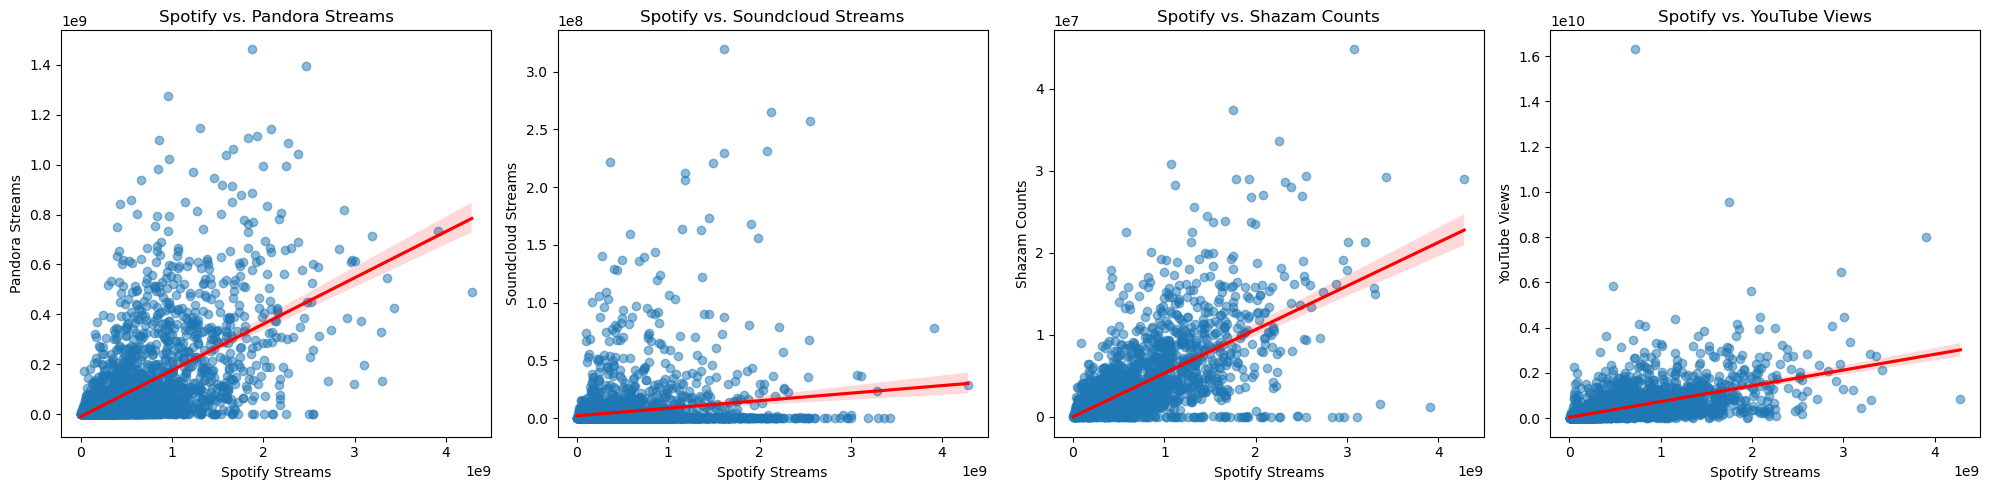

Correlation between Spotify Streams and Pandora Streams: 0.57
Correlation between Spotify Streams and Soundcloud Streams: 0.17
Correlation between Spotify Streams and Shazam Counts: 0.66
Correlation between Spotify Streams and YouTube Views: 0.52


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_spotify_songs2024.csv", encoding='ISO-8859-1')

# Convert all string columns to utf-8 encoding if needed
df = df.apply(lambda x: x.str.encode('utf-8').str.decode('utf-8') if x.dtype == 'object' else x)

# List of platforms to compare, including YouTube
platforms = ["Pandora Streams", "Soundcloud Streams", "Shazam Counts", "YouTube Views"]

# Set up the plotting area
plt.figure(figsize=(20, 5))

for i, platform in enumerate(platforms, 1):
    plt.subplot(1, 4, i)  # Update the number of subplots to 4 for YouTube
    # Scatter plot with regression line
    sns.regplot(
        x="Spotify Streams",
        y=platform,
        data=df,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red"}
    )
    plt.title(f"Spotify vs. {platform}")
    plt.xlabel("Spotify Streams")
    plt.ylabel(platform)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Calculate and print correlation coefficients for each platform
for platform in platforms:
    correlation = df["Spotify Streams"].corr(df[platform])
    print(f"Correlation between Spotify Streams and {platform}: {correlation:.2f}")


## How does the presence of a song on multiple platforms influence its Spotify streaming success?

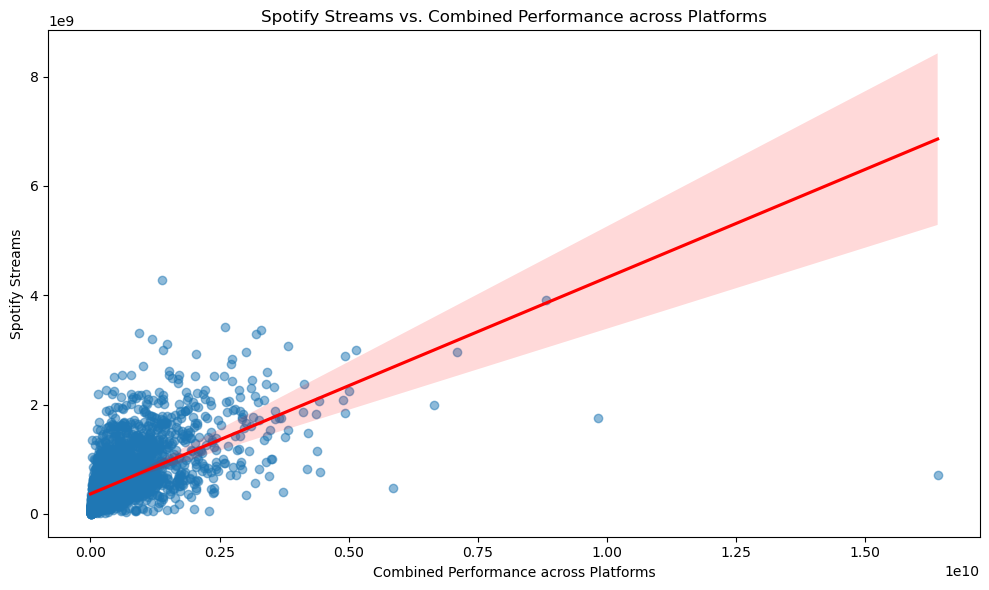

Correlation between Spotify Streams and Combined Performance: 0.59


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned_spotify_songs2024.csv", encoding='ISO-8859-1')

# Convert all string columns to utf-8 encoding if needed
df = df.apply(lambda x: x.str.encode('utf-8').str.decode('utf-8') if x.dtype == 'object' else x)

# List of other platforms to include for the combined performance
platforms = ["Pandora Streams", "Soundcloud Streams", "Shazam Counts", "YouTube Views"]

# Create a combined performance metric by summing streams/views across platforms
df['Combined Performance'] = df[platforms].sum(axis=1)

# Set up the plotting area
plt.figure(figsize=(10, 6))

# Scatter plot for combined performance vs. Spotify streams
sns.regplot(
    x='Combined Performance', 
    y='Spotify Streams', 
    data=df, 
    scatter_kws={"alpha": 0.5}, 
    line_kws={"color": "red"}
)

# Adding titles and labels
plt.title('Spotify Streams vs. Combined Performance across Platforms')
plt.xlabel('Combined Performance across Platforms')
plt.ylabel('Spotify Streams')

# Show the plot
plt.tight_layout()
plt.show()

# Calculate and print correlation coefficient between combined performance and Spotify streams
correlation = df["Spotify Streams"].corr(df["Combined Performance"])
print(f"Correlation between Spotify Streams and Combined Performance: {correlation:.2f}")



## How do explicit vs non explicit tracks perform on different platforms?

Code generated from ChatGPT

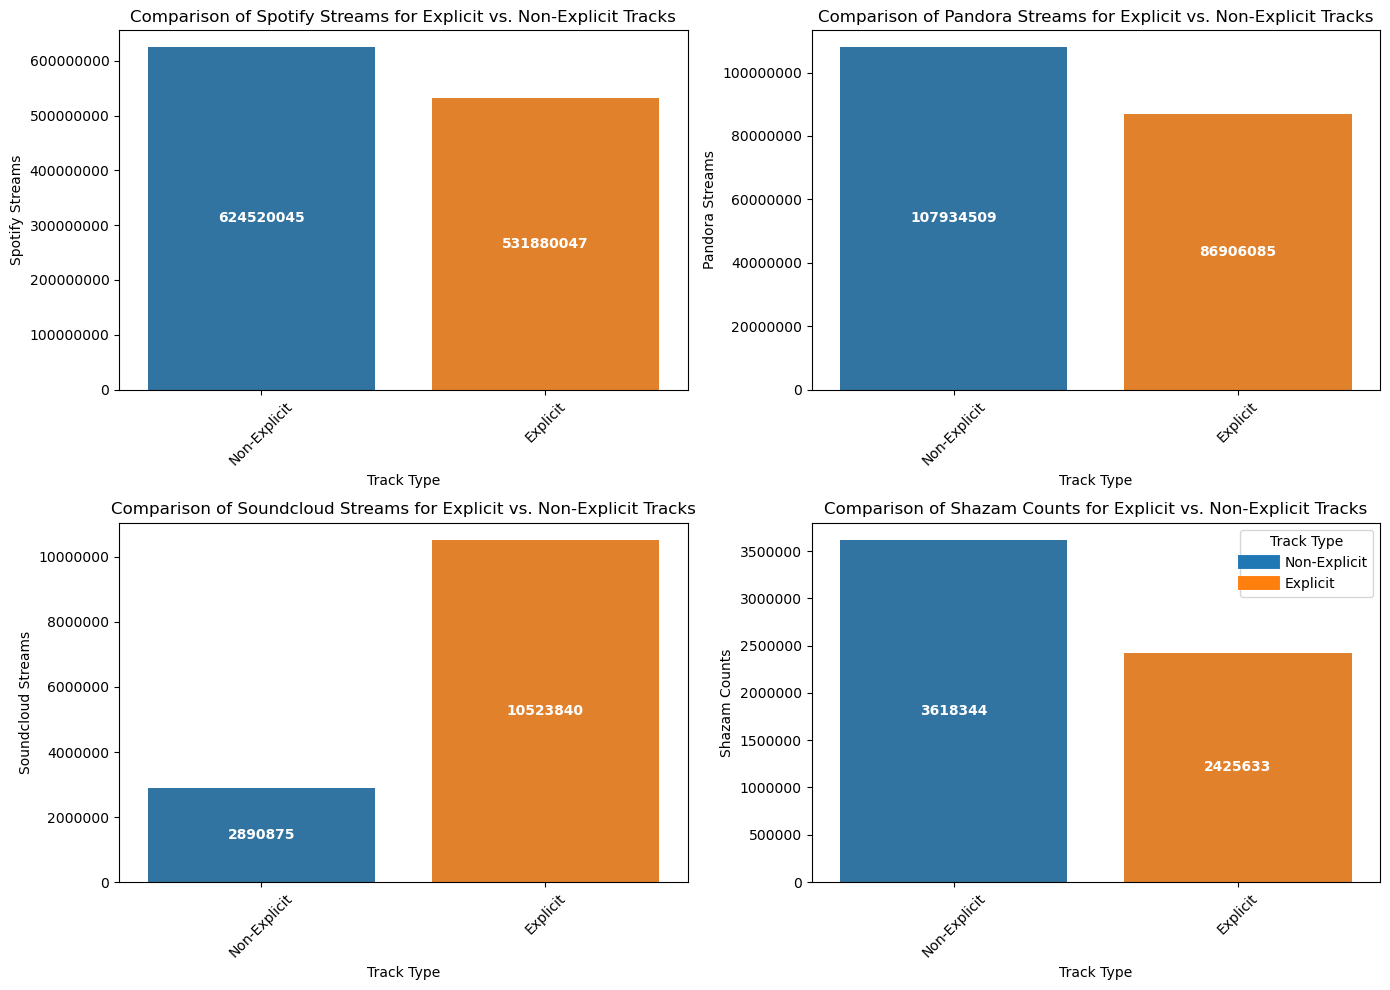

  Explicit Track  Spotify Streams  Pandora Streams  Soundcloud Streams  \
0   Non-Explicit      624,520,046      107,934,509           2,890,876   
1       Explicit      531,880,047       86,906,086          10,523,841   

   Shazam Counts  
0      3,618,344  
1      2,425,633  


In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set display options for float formatting
pd.options.display.float_format = '{:,.0f}'.format  # Round to integers

# Ensure numeric columns are properly formatted
platforms = ["Spotify Streams", "Pandora Streams", "Soundcloud Streams", "Shazam Counts"]
df[platforms] = df[platforms].apply(pd.to_numeric, errors="coerce")
df["Explicit Track"] = df["Explicit Track"].astype(int)

# Group by explicit status and calculate mean performance
summary_stats = df.groupby("Explicit Track")[platforms].mean().reset_index()

# Rename explicit categories for better readability
summary_stats["Explicit Track"] = summary_stats["Explicit Track"].map({0: "Non-Explicit", 1: "Explicit"})

# Plotting - 2 plots per row
n_cols = 2
n_rows = (len(platforms) + n_cols - 1) // n_cols  # Ensure the number of rows is enough

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))

# Flatten axes array to easily iterate over it
axes = axes.flatten()

# Create plots for each platform
for i, platform in enumerate(platforms):
    ax = axes[i]
    
    # Create bar plot
    sns.barplot(
        data=summary_stats,
        x="Explicit Track",
        y=platform,
        hue="Explicit Track",  # Use hue to assign colors based on Explicit Track
        palette={"Non-Explicit": "#1f77b4", "Explicit": "#ff7f0e"},  # Custom colors
        ax=ax,
        legend=False  # Disable the legend, it's handled manually below
    )
    
    # Add labels inside the bars with rounded integers
    for bar in ax.patches:
        ax.annotate(
            f'{int(bar.get_height())}',  # Round the height to an integer
            (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),  # Position at center of the bar
            ha='center', 
            va='center',
            fontsize=10, 
            color='white',  # Use white text for visibility inside bars
            weight='bold'
        )
    
    # Customize the title and labels
    ax.set_title(f"Comparison of {platform} for Explicit vs. Non-Explicit Tracks")
    ax.set_ylabel(platform)
    ax.set_xlabel("Track Type")
    
    # Format y-axis ticks to avoid scientific notation
    ax.ticklabel_format(style='plain', axis='y')  # Plain style removes scientific notation
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)

# Add manual legend
handles = [
    plt.Line2D([0], [0], color="#1f77b4", lw=10, label="Non-Explicit"),
    plt.Line2D([0], [0], color="#ff7f0e", lw=10, label="Explicit"),
]
plt.legend(handles=handles, title="Track Type", loc="upper right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Print Summary Stats
print(summary_stats)


## Does the release date influence a song’s performance?

Code generated from ChatGPT

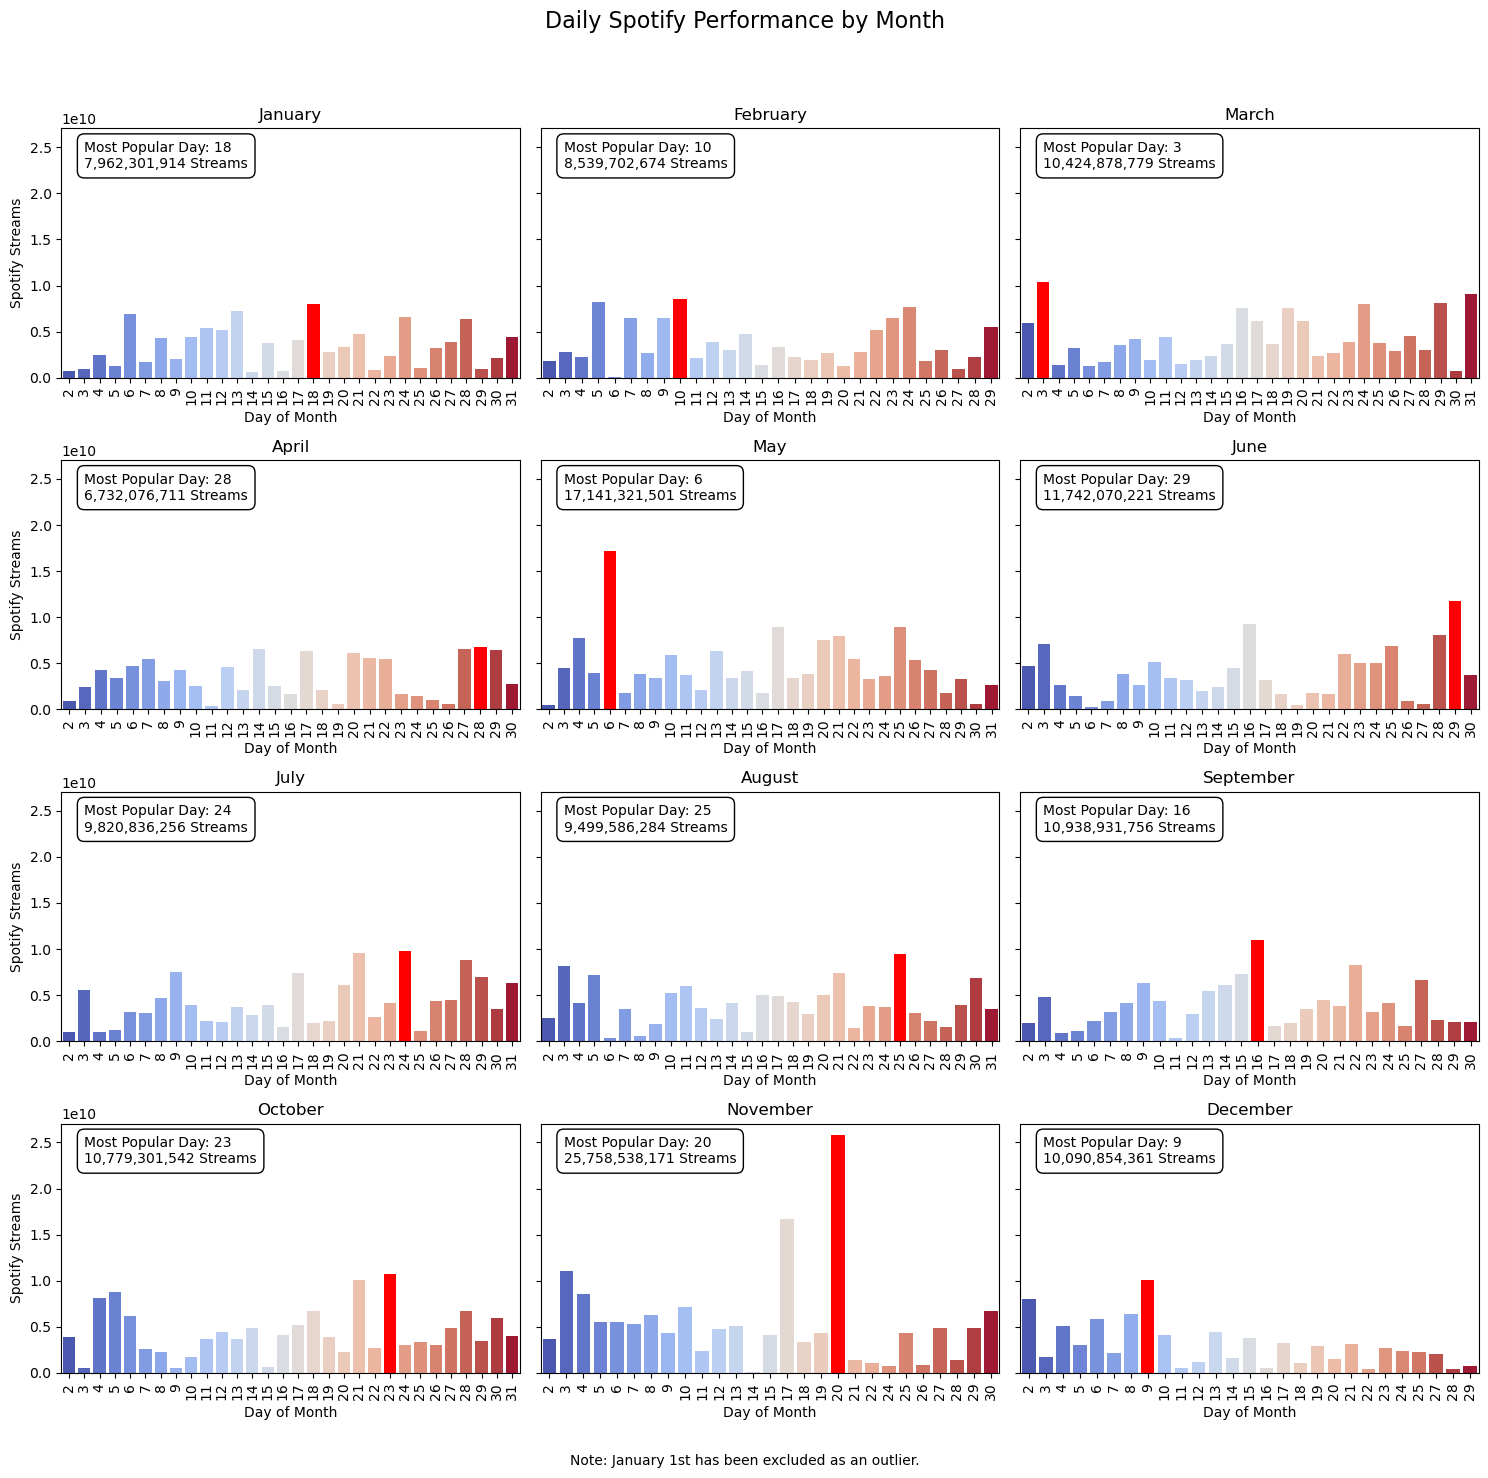

January: Most Popular Day = 18.0, Spotify Streams = 7,962,301,914
February: Most Popular Day = 10.0, Spotify Streams = 8,539,702,674
March: Most Popular Day = 3.0, Spotify Streams = 10,424,878,779
April: Most Popular Day = 28.0, Spotify Streams = 6,732,076,711
May: Most Popular Day = 6.0, Spotify Streams = 17,141,321,501
June: Most Popular Day = 29.0, Spotify Streams = 11,742,070,221
July: Most Popular Day = 24.0, Spotify Streams = 9,820,836,256
August: Most Popular Day = 25.0, Spotify Streams = 9,499,586,284
September: Most Popular Day = 16.0, Spotify Streams = 10,938,931,756
October: Most Popular Day = 23.0, Spotify Streams = 10,779,301,542
November: Most Popular Day = 20.0, Spotify Streams = 25,758,538,171
December: Most Popular Day = 9.0, Spotify Streams = 10,090,854,361


In [91]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the 'Release Date' column exists and is in datetime format
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract Month and Day from the 'Release Date' column
df['Month'] = df['Release Date'].dt.month
df['Day'] = df['Release Date'].dt.day

# Exclude January 1 as an outlier
df = df[~((df['Month'] == 1) & (df['Day'] == 1))]

# Initialize a dictionary to store the most popular day for each month
most_popular_days = {}

# Create subplots for each month
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), sharey=True)
fig.suptitle('Daily Spotify Performance by Month', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for month in range(1, 13):
    # Filter data for the current month
    monthly_data = df[df['Month'] == month]
    
    # Group by day within the month
    daily_performance = monthly_data.groupby('Day')['Spotify Streams'].sum().reset_index()
    
    # Identify the most popular day
    if not daily_performance.empty:
        max_day = daily_performance.loc[daily_performance['Spotify Streams'].idxmax()]
        most_popular_days[month] = (max_day['Day'], max_day['Spotify Streams'])
    
        # Plot for the month with a cooler palette
        sns.barplot(
            data=daily_performance,
            x='Day',
            y='Spotify Streams',
            ax=axes[month - 1],
            hue='Day',  # Set the hue to 'Day' to ensure proper use of palette
            palette='coolwarm',  # Use a cooler color palette (Blues or coolwarm)
            legend=False  # Turn off the legend, as it's unnecessary for this plot
        )
    
        # Add a title to the subplot with the month's name
        axes[month - 1].set_title(calendar.month_name[month], fontsize=12)
        axes[month - 1].set_xlabel('Day of Month')
        axes[month - 1].set_ylabel('Spotify Streams')
        
        # Rotate x-axis labels vertically
        axes[month - 1].tick_params(axis='x', rotation=90)
        
        # Get the bars from the plot
        bars = axes[month - 1].patches
        
        # Correctly identify and highlight the most popular day
        most_popular_day = most_popular_days[month][0]
        for i, bar in enumerate(bars):
            if daily_performance['Day'].iloc[i] == most_popular_day:
                bar.set_facecolor('red')
        
        # Annotate the most popular day with a textbox at the top-left (slightly moved to the right)
        label_text = f"Most Popular Day: {int(most_popular_day)}\n{int(most_popular_days[month][1]):,} Streams"
        axes[month - 1].annotate(
            label_text,
            xy=(0.05, 0.95),  # Position slightly moved to the right
            xycoords='axes fraction',  # Relative to the axes
            fontsize=10,
            color='black',
            ha='left',  # Horizontal alignment
            va='top',   # Vertical alignment
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
        )

# Remove empty subplots
for i in range(len(axes)):
    if i >= 12:
        fig.delaxes(axes[i])

# Add a note about excluding January 1st
plt.figtext(0.5, 0.01, 'Note: January 1st has been excluded as an outlier.', ha='center', fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Print the most popular day for each month
for month, (day, streams) in most_popular_days.items():
    print(f"{calendar.month_name[month]}: Most Popular Day = {day}, Spotify Streams = {int(streams):,}")





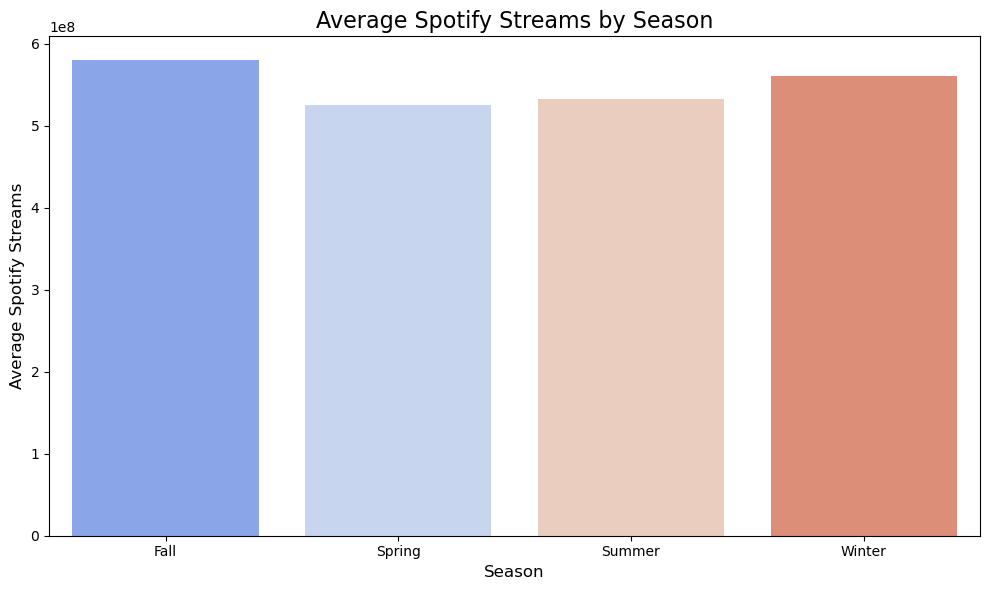

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a 'Release Date' column in your DataFrame in 'YYYY-MM-DD' format
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')  # Convert to datetime, if necessary

# Exclude rows where the Release Date is January 1st
df = df[df['Release Date'].dt.day != 1]  # Filter out January 1st

# Extract the month from the release date
df['Month'] = df['Release Date'].dt.month

# Map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# Step 1: Group the data by season and calculate average performance (Spotify Streams)
seasonal_performance = df.groupby('Season')['Spotify Streams'].mean().reset_index()

# Step 2: Create a bar plot to visualize performance by season
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_performance, x='Season', y='Spotify Streams', hue='Season', palette='coolwarm', legend=False)

# Add labels and title
plt.title('Average Spotify Streams by Season', fontsize=16)
plt.ylabel('Average Spotify Streams', fontsize=12)
plt.xlabel('Season', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()




## Does a song’s country of origin have a relation to its performance?

Code generated from ChatGPT

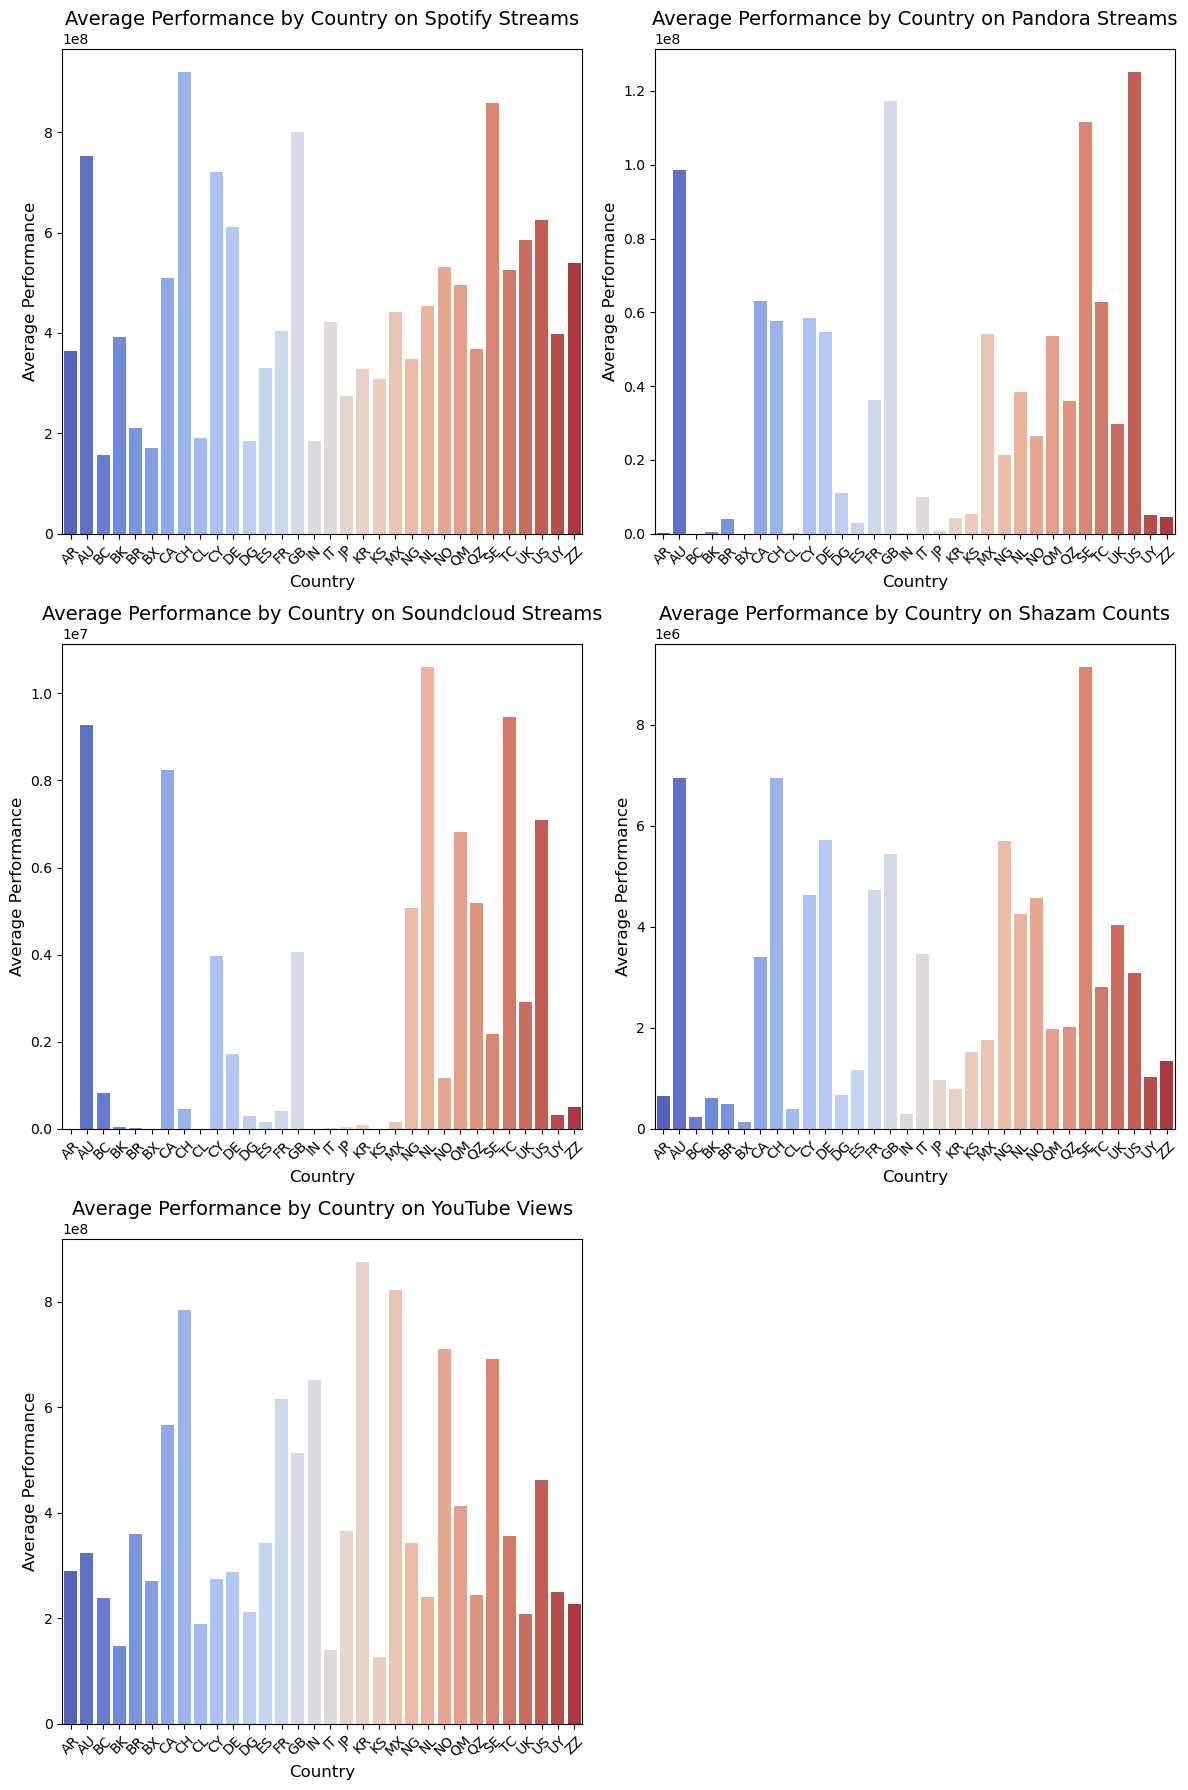

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter out countries with three or fewer songs
country_counts = df['Country'].value_counts()
valid_countries = country_counts[country_counts > 3].index
filtered_df = df[df['Country'].isin(valid_countries)]

# Step 2: Select relevant platforms
platform_columns = ['Spotify Streams', 'Pandora Streams', 'Soundcloud Streams', 'Shazam Counts', 'YouTube Views']
filtered_df = filtered_df[['Country'] + platform_columns]

# Step 3: Calculate average performance per platform per country
performance_by_country = (
    filtered_df.groupby('Country')[platform_columns]
    .mean()
    .reset_index()
    .melt(id_vars='Country', var_name='Platform', value_name='Average Performance')
)

# Step 4: Generate individual plots for each platform as subplots (2 per row)
platforms = performance_by_country['Platform'].unique()

# Set up the plotting area (2 columns per row)
n_cols = 2
n_rows = (len(platforms) + n_cols - 1) // n_cols  # Ensure the number of rows is enough

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))

# Flatten axes array to easily iterate over it
axes = axes.flatten()

# Create plots for each platform
for i, platform in enumerate(platforms):
    ax = axes[i]
    
    # Filter data for the current platform
    platform_data = performance_by_country[performance_by_country['Platform'] == platform]
    
    # Create bar plot, assigning 'Country' to 'hue' to handle the palette correctly
    sns.barplot(
        data=platform_data,
        x='Country',
        y='Average Performance',
        hue='Country',  # Assign hue to 'Country' to handle palette correctly
        palette='coolwarm',
        ax=ax,
        legend=False  # Disable legend, as it's not needed here
    )
    
    # Add labels and title
    ax.set_title(f'Average Performance by Country on {platform}', fontsize=14)
    ax.set_ylabel('Average Performance', fontsize=12)
    ax.set_xlabel('Country', fontsize=12)
    
    # Rotate x-axis labels using tick_params for better handling
    ax.tick_params(axis='x', rotation=45)

# Turn off any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and increase spacing to avoid overlap
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Show the plot
plt.tight_layout()
plt.show()



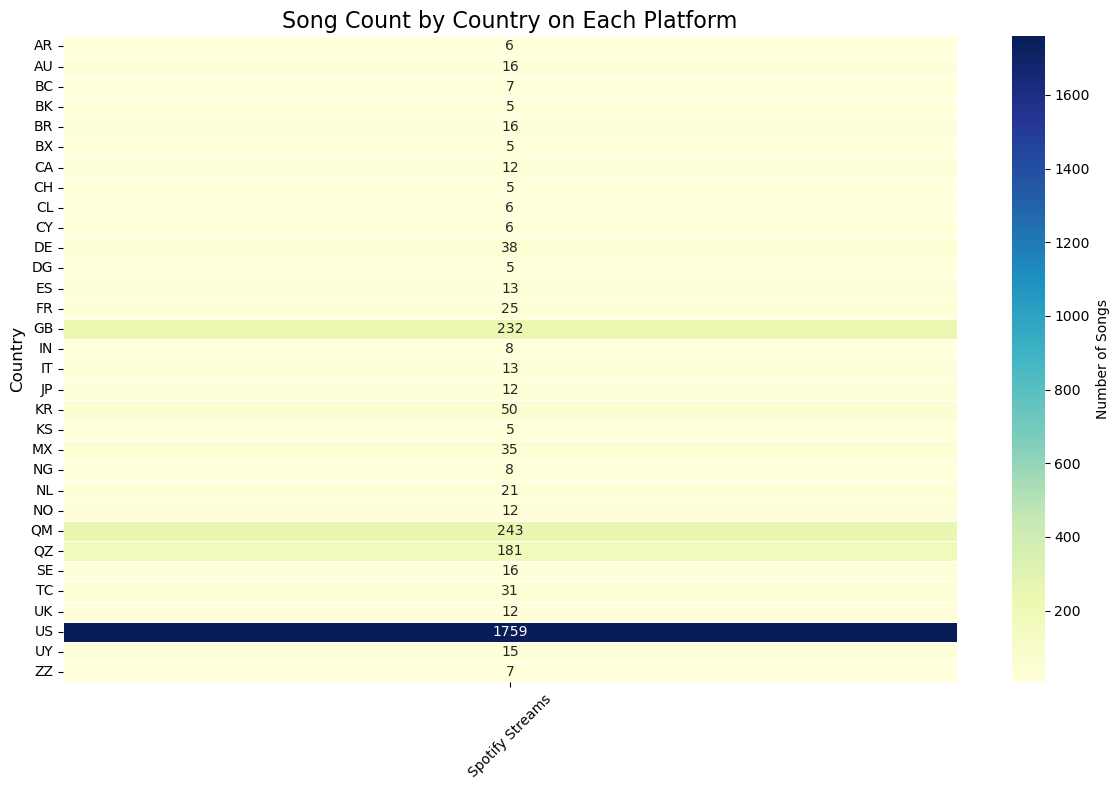

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter valid countries with more than 3 songs
country_counts = df['Country'].value_counts()
valid_countries = country_counts[country_counts > 3].index
filtered_df = df[df['Country'].isin(valid_countries)]

# Step 2: Select relevant platforms
platform_columns = ['Spotify Streams']
filtered_df = filtered_df[['Country'] + platform_columns]

# Step 3: Create a presence matrix
# Convert performance values to presence (1 if a song exists, 0 otherwise)
presence_matrix = filtered_df.melt(id_vars='Country', var_name='Platform', value_name='Value')
presence_matrix['Presence'] = presence_matrix['Value'].notna().astype(int)

# Step 4: Calculate the song count per country and platform (sum of presence)
presence_summary = (
    presence_matrix.groupby(['Country', 'Platform'])['Presence']
    .sum()
    .unstack(fill_value=0)
)

# Step 5: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    presence_summary,
    annot=True,
    fmt="d",  # Format as integers
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Number of Songs'}
)

# Add titles and labels
plt.title('Song Count by Country on Each Platform', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [67]:
import pandas as pd

# Step 1: Filter valid countries with more than 3 songs
country_counts = df['Country'].value_counts()
valid_countries = country_counts[country_counts > 3].index
filtered_df = df[df['Country'].isin(valid_countries)]

# Step 2: Select relevant platforms
platform_columns = ['Spotify Streams', 'Pandora Streams', 'Soundcloud Streams', 'Shazam Counts', 'YouTube Views']
filtered_df = filtered_df[['Country'] + platform_columns]

# Step 3: Calculate the average performance by country and platform
performance_summary = filtered_df.groupby('Country')[platform_columns].mean()

# Step 4: Round the performance to integers
performance_summary = performance_summary.round(0).astype(int)

# Step 5: Rank countries by platform performance
performance_ranking = performance_summary.rank(ascending=False, method='dense').astype(int)

# Step 6: Order countries for each platform and display with counts
ranked_platforms = {}
for platform in platform_columns:
    ranked_platforms[platform] = (
        performance_summary[platform]
        .sort_values(ascending=False)
        .index.tolist()
    )

# Display the rankings for each platform (Top 10 countries only)
for platform, ranked_countries in ranked_platforms.items():
    print(f"Top 10 performing countries for {platform}:")
    for i, country in enumerate(ranked_countries[:10], 1):  # Limit to top 10
        streams = performance_summary.loc[country, platform]
        print(f"{i}. {country} - {streams:,}")
    print()


Top 10 performing countries for Spotify Streams:
1. CH - 920,871,138
2. SE - 859,091,339
3. GB - 800,990,047
4. AU - 751,907,491
5. CY - 720,596,329
6. US - 625,506,696
7. DE - 612,042,351
8. UK - 586,044,166
9. ZZ - 538,917,370
10. NO - 531,338,393

Top 10 performing countries for Pandora Streams:
1. US - 125,242,011
2. GB - 117,211,920
3. SE - 111,481,571
4. AU - 98,596,660
5. CA - 63,091,139
6. TC - 62,696,701
7. CY - 58,430,592
8. CH - 57,523,622
9. DE - 54,730,656
10. MX - 54,035,544

Top 10 performing countries for Soundcloud Streams:
1. NL - 10,617,032
2. TC - 9,457,304
3. AU - 9,266,132
4. CA - 8,232,606
5. US - 7,085,661
6. QM - 6,807,460
7. QZ - 5,182,582
8. NG - 5,073,566
9. GB - 4,062,567
10. CY - 3,963,449

Top 10 performing countries for Shazam Counts:
1. SE - 9,147,797
2. CH - 6,940,438
3. AU - 6,940,217
4. DE - 5,719,334
5. NG - 5,687,900
6. GB - 5,443,380
7. FR - 4,732,680
8. CY - 4,616,359
9. NO - 4,562,786
10. NL - 4,248,917

Top 10 performing countries for YouTube V